Scikit-Learn

El diseño de sklearn esta basado en el paradigma de la POO y sigue un patron de diseño uniforme basado en estimadores (estimators), predictores (predictors) y transformadores (transformers)

* Estimadores : Estos objetos se traducen en clases (propio de la POO) que sirven para entrenar modelos.

* Predictores : Son objetos que extienden a los estimadores (metodos como por ejemplo : `predict()` y `predict_proba()`

* Transformadores : Se implementaron pensando en el preprocesamiento (escalado, codificacion, reducccion de dimensionalidad)

# Primeros pasos para la construccion de modelos a Aprendizaje Automatico (Machine Learning)

* Aprendizaje Supervisado
  > $y  \sim modelo(x_1,x_2,x_3,...x_n)$

      > y (Variable Dependiente) : Cuantitativa => Problema de Regresion

      > y (Variable Dependiente) : Cualitativa => Problema de Clasificacion

* Aprendizaje No Supervisado
  > No contamos con una variable dependiente.


In [1]:
# Modelos y datos

# Interactuar con el sistema operativo
import os

# Operaciones de naturaleza matricial
import numpy as np

# Manipulacion de datos
import pandas as pd

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
# Funcion que haga la tarea de particionar el conjunto de datos
  # Subconjunto de datos para entrenar el modelo => Obtencion de los parametros del modelo
  # Subconjunto de datos para testear el modelo => Obtencion de por lo menos un indicador de calidad
# MOdelo a ajustar : La instancia de una clase de sklearn para construir modelos de Aprendizaje Automatico
# Calcular indicadores de calidad

# Funcion (Pues todos sus caracteres estan en minuscula) para particionamiento
from sklearn.model_selection import train_test_split

# Modelo de Regresion lineal : Una clase (la primera letra de cada palabra esta en mayusculas) de un submodulo
from sklearn.linear_model import LinearRegression

# Submodulo metrics : Provee funciones para calcular indicadores de calidad
from sklearn import metrics

# Datos
bikes = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/refs/heads/master/bikes.csv")
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   holiday     731 non-null    int64  
 2   weekday     731 non-null    int64  
 3   workingday  731 non-null    int64  
 4   weathersit  731 non-null    int64  
 5   temp        731 non-null    float64
 6   atemp       731 non-null    float64
 7   hum         731 non-null    float64
 8   windspeed   731 non-null    float64
 9   rentals     731 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 57.2 KB


# Primer Modelo de Regresion Lineal Multiple

$$
y = rentals \sim  c_1 * season + c_2 * holiday + c_3 * weekday + c_4 * workingday + c_5 * weathersit + c_6 * temp + c_7 * atemp + c_8 * hum + c_9 * windspeed +  b +\epsilon
$$

**Objetivo** : Calcular los valores de cada parametro : $c_i$

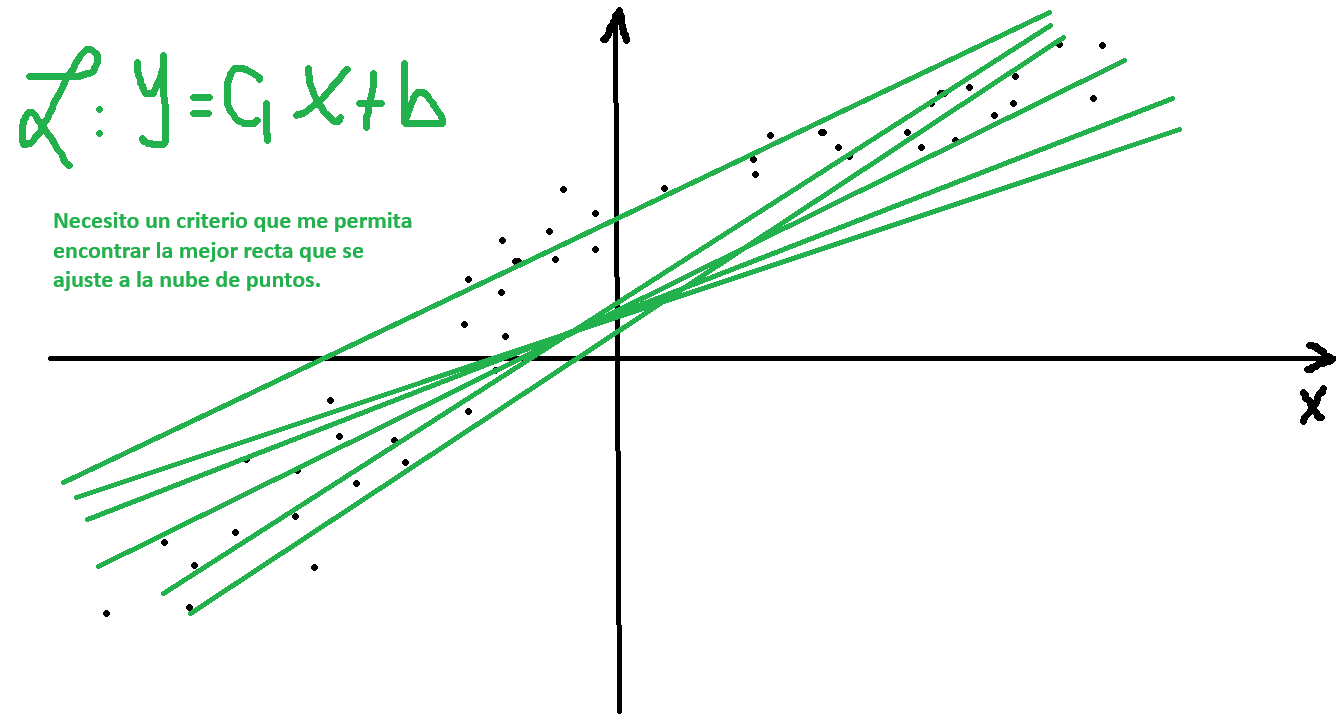

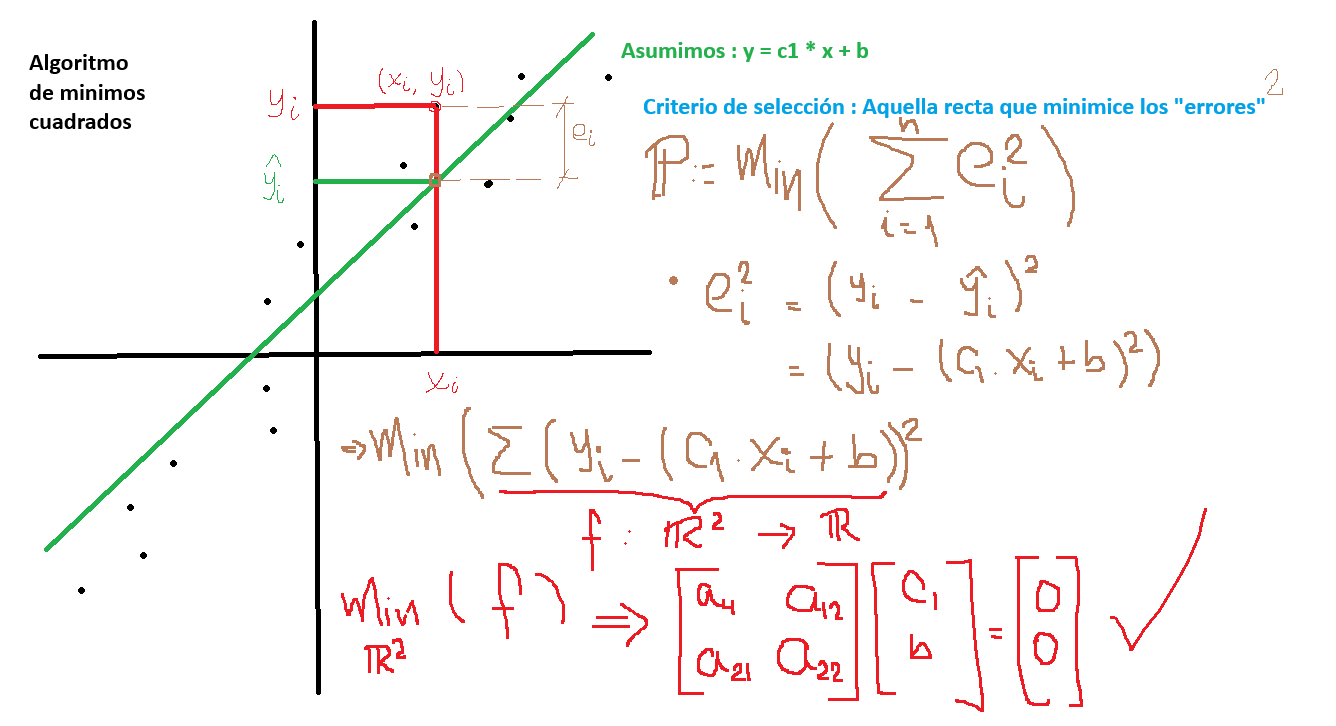

In [5]:
# Primer Paso : Particionamiento de datos (el subconjunto de mayor tamaño sea el de entrenamiento)
  # Subconjunto de entrenamiento : 80% de los datos
  # Subconjunto de testeo : 20% de los datos

# Definamos la variable dependiente : Columna rentals de nuestro dataframe bikes
y = bikes.rentals

# Definamos a las variables independientes : Todas las columnas de bikes excepto rentals
X = bikes.drop(["rentals"], axis = 1)

# Particionamiento => train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size= 0.8)
# Utiliza un muestreo aleatorio

# Segundo Paso : Instanciar la clase a modelar (LinearRegression)
model_base_bikes = LinearRegression()

# Ajustamos el modelo con el subconjunto de entrenamiento
model_base_bikes.fit(X_train, y_train)
# Calculamos los parametros del modelo

# 3er Paso  : Indicadores de calidad : MAPE (promedio de errores)
# Etapa1 : Usar el modelo (recientemente ajustado) y los datos de testeo de las variables independientes
# para obtener pronosticos de la variable dependiente
y_test_forecast = model_base_bikes.predict(X_test)
#Etapa2 : Calcular un indicador de calidad (Busca comparar lo que un modelo pronostica : y_test_forecast con datos reales : y_test)
mape_base = metrics.mean_absolute_percentage_error(y_test, y_test_forecast)*100
mape_base



88.46920207011118

# Segundo modelo de Regresion Lineal Multiple

NO vamos a considerar a las variables que de manera muy natural no son de naturaleza cuantitativa : Consideraremos eliminar a las variables : season, holiday, weekday, workingday, weathersit

In [10]:
# Definamos a la variable dependiente
y = bikes.rentals

# Definamos a las variables independientes
X = bikes.drop(["rentals", "season", "holiday", "weekday", "workingday", "weathersit"], axis = 1)

# Particionamiento
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.05)

# Instanciamos la clase a modelar
model2_bikes = LinearRegression()

# Ajustamos el modelo con el subconjunto de entrenamiento
model2_bikes.fit(X_train, y_train)

# Construyamos pronosticos
y_test2_forecast = model2_bikes.predict(X_test)

# Calculamos el KPI
metrics.mean_absolute_percentage_error(y_test, y_test2_forecast)

0.770666396128114

# Tercer modelos de Regresion Lineal Multiple

En este escenarios vamos a seguir condirando las mismas variables independientes que el segundo modelo, pero sin considerar el termino independiente.

In [11]:
# Al considerar el no uso de un termino independiente del modelo , consideraremos
# leer la documentacion de la clase LinearRegression
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

In [12]:
# Definamos a la variable dependiente
y = bikes.rentals

# Definamos a las variables independientes
X = bikes.drop(["rentals", "season", "holiday", "weekday", "workingday", "weathersit"], axis = 1)

# Particionamiento
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.05)

# Instanciar la clase a modelar , vamos a modificar el valor por defecto del argumento fit_intercetp
model3_bikes = LinearRegression(fit_intercept= False)

# Ajustamos el modelo usando los datos de entrenamiento
model3_bikes.fit(X_train,y_train)

# Calculamos pronosticos
y_test3_forecast = model3_bikes.predict(X_test)

# Calculamos un indicador de calidad
metrics.mean_absolute_percentage_error(y_test, y_test3_forecast)*100

73.30578684187496

# Analisis para el primer modelo

En vista de que no puedo asegurar la obtencion de una mejor configuracion de cada modelo ya construido => Utilizaremos una estrategia estocastica

In [13]:
# Empaquetemos la idea explicada en una funcion

def analisis_modelo_base():
  # Definamos la variable dependiente : Columna rentals de nuestro dataframe bikes
  y = bikes.rentals

  # Definamos a las variables independientes : Todas las columnas de bikes excepto rentals
  X = bikes.drop(["rentals"], axis = 1)

  # Particionamiento => train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y , train_size= 0.8)
  # Utiliza un muestreo aleatorio

  # Segundo Paso : Instanciar la clase a modelar (LinearRegression)
  model_base_bikes = LinearRegression()

  # Ajustamos el modelo con el subconjunto de entrenamiento
  model_base_bikes.fit(X_train, y_train)
  # Calculamos los parametros del modelo

  # 3er Paso  : Indicadores de calidad : MAPE (promedio de errores)
  # Etapa1 : Usar el modelo (recientemente ajustado) y los datos de testeo de las variables independientes
  # para obtener pronosticos de la variable dependiente
  y_test_forecast = model_base_bikes.predict(X_test)
  #Etapa2 : Calcular un indicador de calidad (Busca comparar lo que un modelo pronostica : y_test_forecast con datos reales : y_test)
  return metrics.mean_absolute_percentage_error(y_test, y_test_forecast)*100



In [26]:
# Realicemos 1000 experimentos :
  # Seleccionar de manera aleatoria un subconjunto de entrenamiento/testeo
  # Obtener un indicador de calidad : Necesitamos es analizar la posibilidad de obtener un menor valor del MAPE

# Lista para almacenar los resultados : KPI
lista_mape_base = list()

for exp in range(1000*5):
  lista_mape_base.append(analisis_modelo_base())

# Mostremos El valor minimo de todos esos mapes obtenidos en estos experimentos
min(lista_mape_base)

42.26143629031336

In [27]:
# Agregar la funcionalidad de que para cada ejecucion de la funcion analisis_modelo_base guarde tambien
# X_train, y_train

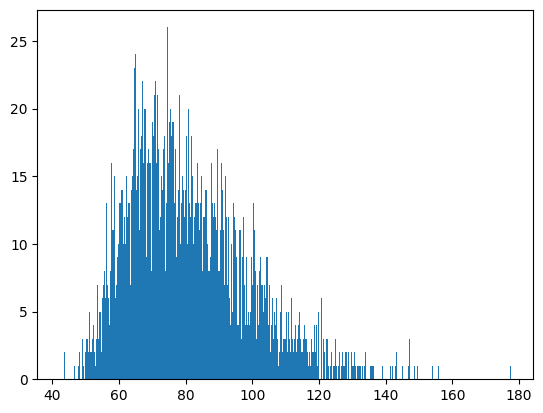

In [34]:
# Histograma de los indicadores de calidad obtenidos : lista_mape_base
plt.hist(lista_mape_base, bins = 1000)
plt.show()

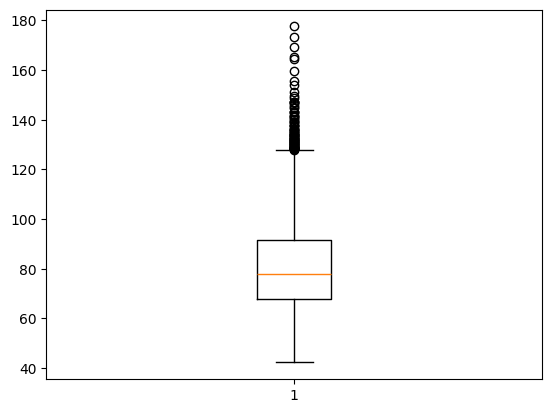

In [32]:
# Boxplot
plt.boxplot(lista_mape_base)
plt.show()

In [33]:
# Estadisticas Inferencial : Shapiro-Willk
from scipy.stats import shapiro
shapiro(lista_mape_base)

# pvalue=np.float64(5.288967845376375e-36) : Concluimos que los elementos de lista_mape_base efectivamente
# no provienen de una normal

ShapiroResult(statistic=np.float64(0.9571965992374663), pvalue=np.float64(5.288967845376375e-36))

# **Tareita** : Realizar el mismo analisis para el segundo y tercer modelo

# Estrategia de One-Hot-Encoding para las variables de naturaleza cuantitativa

<Axes: xlabel='season'>

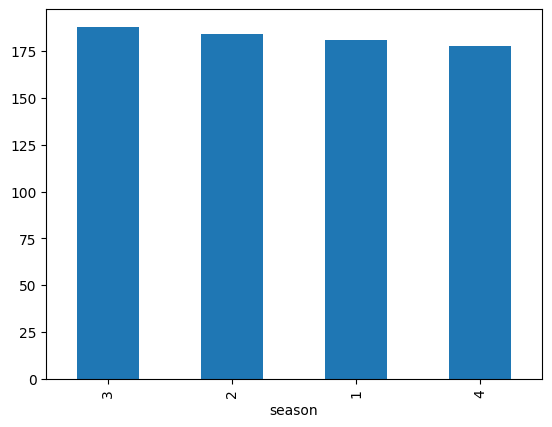

In [41]:
# Columna season : Posibles valores de la columna
bikes.season.value_counts().plot(kind = "bar")

In [35]:
# Columna holiday : Posibles valores de la columna
bikes.holiday.unique()

array([0, 1])

<Axes: xlabel='holiday'>

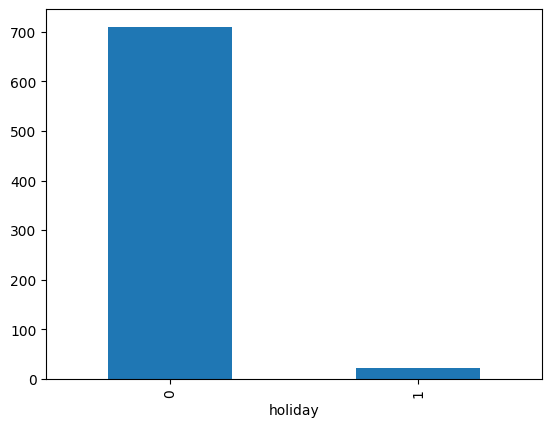

In [40]:
# Distribucion de valores en la columna holiday
bikes.holiday.value_counts().plot(kind = "bar")

<Axes: xlabel='weekday'>

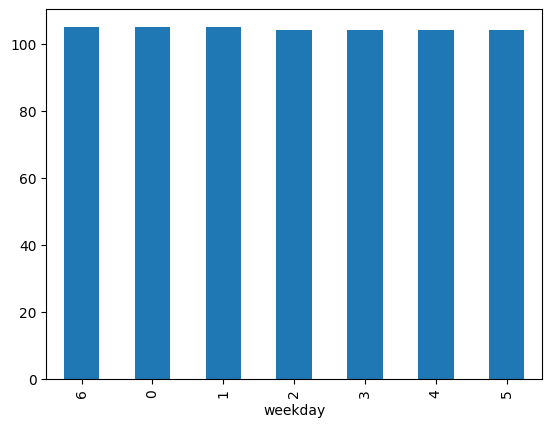

In [42]:
# Columna weekday
bikes.weekday.value_counts().plot(kind = "bar")

<Axes: xlabel='workingday'>

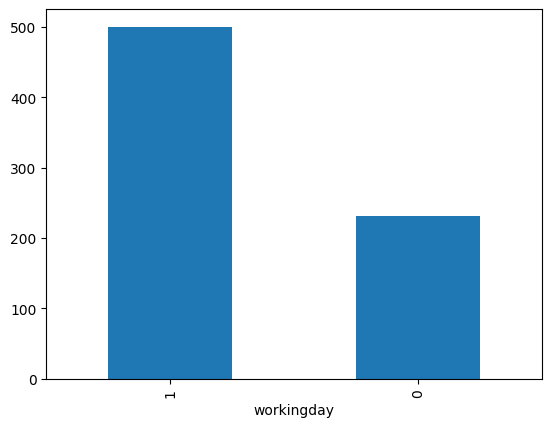

In [43]:
# Columna workingday
bikes.workingday.value_counts().plot(kind = "bar")

<Axes: xlabel='weathersit'>

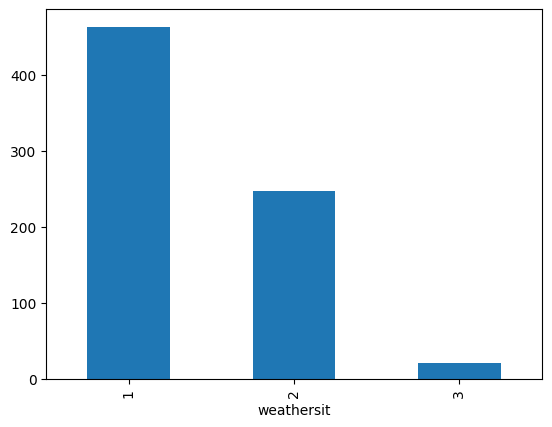

In [44]:
# Columna weathersit
bikes.weathersit.value_counts().plot(kind = "bar")

In [ ]:
# Consideremos transformar a las columnas season, weekday, workingday

In [46]:
# Construyamos las columnas de hot-encoding para estas tres columnas de interes
lista_columnas_OHE = ["season", "weekday", "workingday"]

# Empecemos con un dataframe vacio
data_cuali = pd.DataFrame()

for col in lista_columnas_OHE:
  data_cuali = pd.concat([data_cuali, pd.get_dummies(bikes[col], prefix = col, dtype= "int")], axis = 1)

data_cuali

,season_1,season_2,season_3,season_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1
0,1,0,0,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,0,0,0,0,0,0,0,1,0,0,0,1
727,1,0,0,0,0,0,0,0,0,1,0,0,1
728,1,0,0,0,0,0,0,0,0,0,1,1,0
729,1,0,0,0,1,0,0,0,0,0,0,1,0


In [49]:
# Construir un nuevo dataframe : bikes2
# Como resultado de eliminar las columnas lista_columnas_OHE y agregar las columnas de data_cuali
bikes2 = pd.concat([bikes.drop(["season", "holiday", "weekday", "workingday", "weathersit"], axis = 1), data_cuali], axis = 1)
bikes2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          731 non-null    float64
 1   atemp         731 non-null    float64
 2   hum           731 non-null    float64
 3   windspeed     731 non-null    float64
 4   rentals       731 non-null    int64  
 5   season_1      731 non-null    int64  
 6   season_2      731 non-null    int64  
 7   season_3      731 non-null    int64  
 8   season_4      731 non-null    int64  
 9   weekday_0     731 non-null    int64  
 10  weekday_1     731 non-null    int64  
 11  weekday_2     731 non-null    int64  
 12  weekday_3     731 non-null    int64  
 13  weekday_4     731 non-null    int64  
 14  weekday_5     731 non-null    int64  
 15  weekday_6     731 non-null    int64  
 16  workingday_0  731 non-null    int64  
 17  workingday_1  731 non-null    int64  
dtypes: float64(4), int64(14)
memor

# Tareita :
* Replicar la construccion y el analisis de un modelo de regresion lineal multiple con el dataframe bikes2


# Analisis del modulo `linear_model`

In [50]:
# Mostremos los elementos que provee el submodulo linear_model
import sklearn.linear_model
dir(sklearn.linear_model)

['ARDRegression',
 'BayesianRidge',
 'ElasticNet',
 'ElasticNetCV',
 'GammaRegressor',
 'HuberRegressor',
 'Lars',
 'LarsCV',
 'Lasso',
 'LassoCV',
 'LassoLars',
 'LassoLarsCV',
 'LassoLarsIC',
 'LinearRegression',
 'LogisticRegression',
 'LogisticRegressionCV',
 'MultiTaskElasticNet',
 'MultiTaskElasticNetCV',
 'MultiTaskLasso',
 'MultiTaskLassoCV',
 'OrthogonalMatchingPursuit',
 'OrthogonalMatchingPursuitCV',
 'PassiveAggressiveClassifier',
 'PassiveAggressiveRegressor',
 'Perceptron',
 'PoissonRegressor',
 'QuantileRegressor',
 'RANSACRegressor',
 'Ridge',
 'RidgeCV',
 'RidgeClassifier',
 'RidgeClassifierCV',
 'SGDClassifier',
 'SGDOneClassSVM',
 'SGDRegressor',
 'TheilSenRegressor',
 'TweedieRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_bayes',
 '_cd_fast',
 '_coordinate_descent',
 '_glm',
 '_huber',
 '_least_angle',
 '_linear_loss',
 '_logistic',
 '_omp',
 '_passiv

In [ ]:
# # Lista de modelos de interes del submodulo linear_model
#  'ARDRegression',
#  'BayesianRidge',
#  'ElasticNet',
#  'ElasticNetCV',
#  'GammaRegressor',
#  'HuberRegressor',
#  'Lars',
#  'LarsCV',
#  'Lasso',
#  'LassoCV',
#  'LassoLars',
#  'LassoLarsCV',
#  'LassoLarsIC',
#  'LinearRegression',
#  'LogisticRegression',
#  'LogisticRegressionCV',
#  'MultiTaskElasticNet',
#  'MultiTaskElasticNetCV',
#  'MultiTaskLasso',
#  'MultiTaskLassoCV',
#  'OrthogonalMatchingPursuit',
#  'OrthogonalMatchingPursuitCV',
#  'PassiveAggressiveClassifier',
#  'PassiveAggressiveRegressor',
#  'Perceptron',
#  'PoissonRegressor',
#  'QuantileRegressor',
#  'RANSACRegressor',
#  'Ridge',
#  'RidgeCV',
#  'RidgeClassifier',
#  'RidgeClassifierCV',
#  'SGDClassifier',
#  'SGDOneClassSVM',
#  'SGDRegressor',
#  'TheilSenRegressor',
#  'TweedieRegressor',